In [95]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()


a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train

In [98]:
sleepdata = pd.read_csv("sleepdisorder-filtered.csv")
Dsteps = pd.DataFrame(sleepdata["Daily Steps"])
Qsleep = pd.DataFrame(sleepdata["Quality of Sleep"])
Sduration = pd.DataFrame(sleepdata["Sleep Duration"])
age = pd.DataFrame(sleepdata["Age"])

Qsleep against Dsteps

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Dsteps_Train, Dsteps_Test, Qsleep_Train, Qsleep_Test, Sduration_Train, Sduration_Test, age_Train, age_Test = train_test_split(Dsteps, Qsleep, Sduration, age, test_size = 0.20)


linreg = LinearRegression()       
linreg.fit(Dsteps_Train, Qsleep_Train)      


print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

Intercept of Regression 	: b =  [6.60975988]
Coefficients of Regression 	: a =  [[8.3634412e-05]]


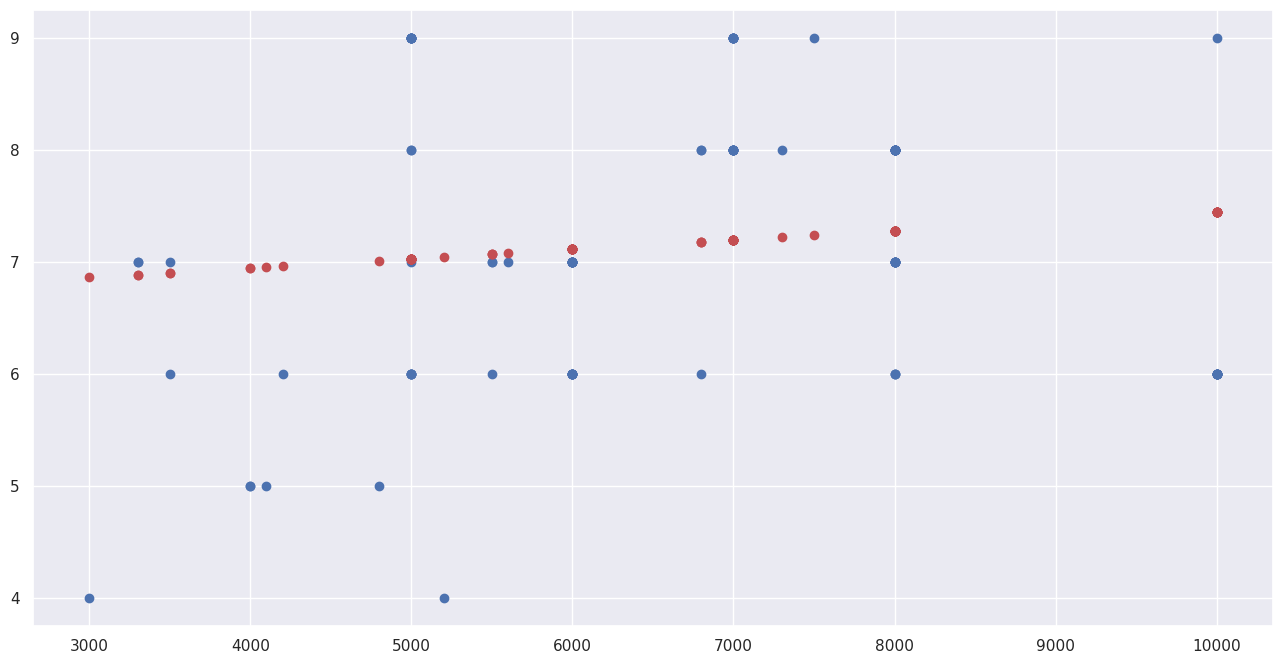

In [103]:
Qsleep_Train_Pred=linreg.predict(Dsteps_Train)
Qsleep_Test_Pred=linreg.predict(Dsteps_Test)

f=plt.figure(figsize=(16,8))
plt.scatter(Dsteps_Train,Qsleep_Train)
plt.scatter(Dsteps_Train, Qsleep_Train_Pred, color='r')
plt.show()

In [104]:
#goodness of fit (train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Dsteps_Train, Qsleep_Train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Train, Qsleep_Train_Pred ))
print()
#goodness of fit (test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Dsteps_Test,  Qsleep_Test))
print("Mean Squared Error (MSE) \t:", mean_squared_error( Qsleep_Test,  Qsleep_Test_Pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.013725085131177983
Mean Squared Error (MSE) 	: 1.490693294532125

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.009258288087775735
Mean Squared Error (MSE) 	: 2.01812328003422



In [ ]:
Both the training set and the test set have very low R-squared values, indicatinf that model does not explain much of the ariance in the quality of sleep based on daily steps alone. In practical terms, knowing the number of daily steps a person takes doesnt give us much information on the quality of sleep.
The MSE values are high, suggesting predictions made by the model are quite far from the actual values.

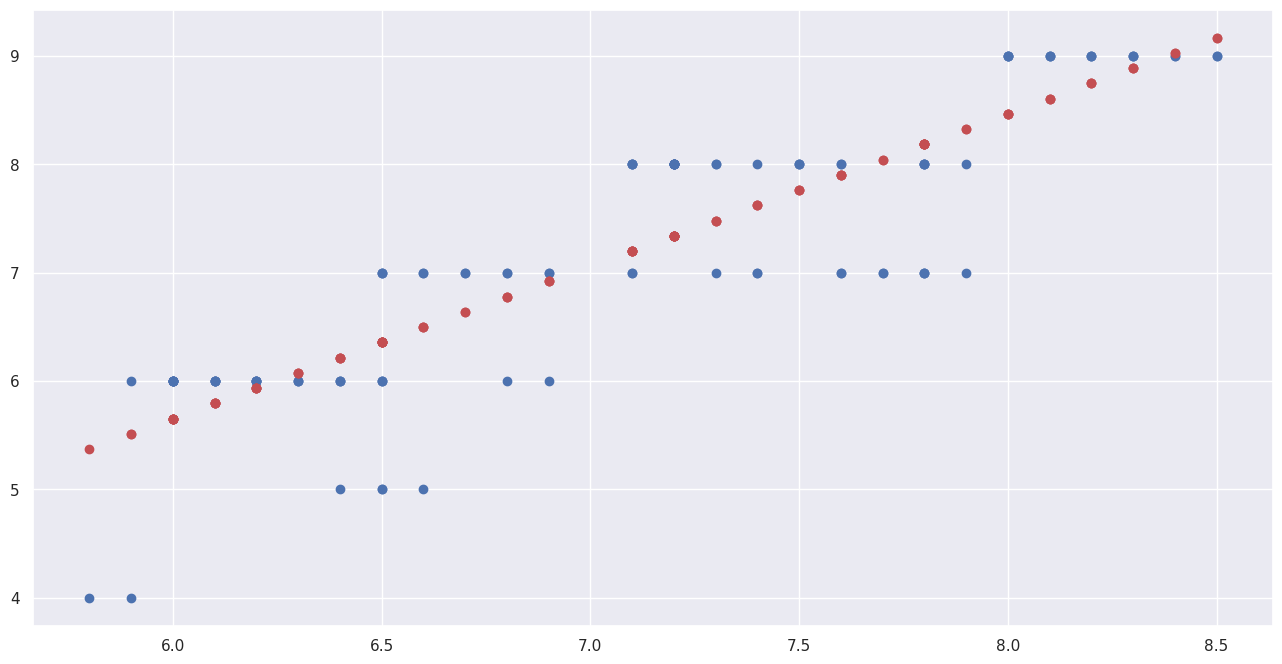

In [107]:
linreg.fit(Sduration_Train, Qsleep_Train)
Qsleep_Train_Pred=linreg.predict(Sduration_Train)
Qsleep_Test_Pred=linreg.predict(Sduration_Test)

f=plt.figure(figsize=(16,8))
plt.scatter(Sduration_Train,Qsleep_Train)
plt.scatter(Sduration_Train, Qsleep_Train_Pred, color='r')
plt.show()

In [108]:
#goodness of fit (train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Sduration_Train, Qsleep_Train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Train, Qsleep_Train_Pred ))
print()
#goodness of fit (test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Sduration_Test,  Qsleep_Test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Test,  Qsleep_Test_Pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7578569459060178
Mean Squared Error (MSE) 	: 0.3659841912368194

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7305351954386516
Mean Squared Error (MSE) 	: 0.5488950234925691



In [118]:
The High R-squared values of both train and test datasets suggest that there is a strong linear relasionship between sleep duration and quality of sleep.
Low Mean Squared Error suggest that predictions are relatively close to the actual observed values.

SyntaxError: invalid syntax (1066451467.py, line 1)

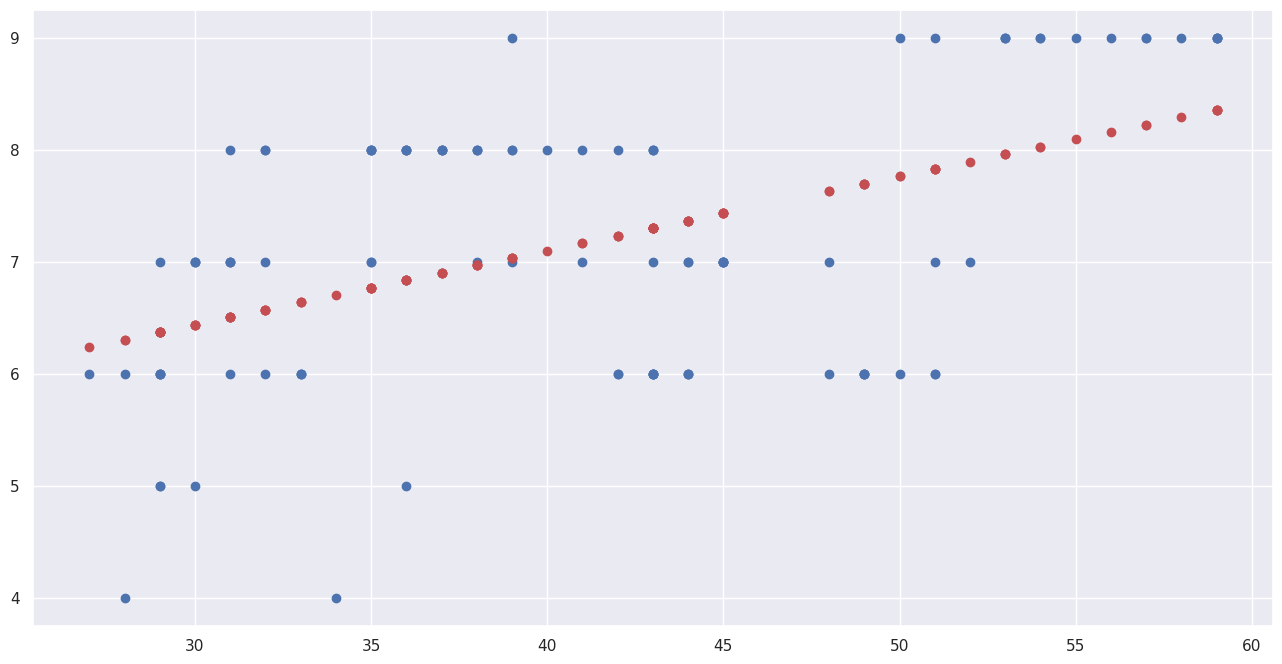

In [111]:
linreg.fit(age_Train, Qsleep_Train)
Qsleep_Train_Pred=linreg.predict(age_Train)
Qsleep_Test_Pred=linreg.predict(age_Test)

f=plt.figure(figsize=(16,8))
plt.scatter(age_Train,Qsleep_Train)
plt.scatter(age_Train, Qsleep_Train_Pred, color='r')
plt.show()

In [115]:
#goodness of fit (train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(age_Train, Qsleep_Train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Train, Qsleep_Train_Pred ))
print()
#goodness of fit (test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(age_Test,  Qsleep_Test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Test,  Qsleep_Test_Pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.228394047194744
Mean Squared Error (MSE) 	: 1.1662344874916044

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2523918408289062
Mean Squared Error (MSE) 	: 1.5228645490807635



In [120]:
Moderate R-squared Values for both the training set and test set, indicating that age explains a certain portion of the variability in Quality of Sleep, but not as much as Sleep Duration does. The model captures some of the trends in the data but leaves a significant amount unexplained.
High Mean Squared Error (MSE): The MSE values are higher than in the Sleep Duration model, suggesting that the predictions are less accurate. The MSE is somewhat higher in the test set, which suggests that the model's predictions are not as robust on new, unseen data.

SyntaxError: invalid syntax (249117135.py, line 1)

In [ ]:
Sleep Duration is the best predictor for quality of sleep. It has the highest variance(R^2) and lowest mean squared error(MSE). Therefore, Sleep Duration has the least error in comparison to the other 2 models.